In [2]:
"""\
# Copyright (C) 2023 Jesús Bautista Villar <jesbauti20@gmail.com>
"""
!python3 --version

Python 3.10.12


In [1]:
import numpy as np
import os
import sys

from tqdm import tqdm

# Graphic tool
import matplotlib.pyplot as plt

# --------------------------------------------------------------------------------------

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from gvf_inv.gvf_traj.gvf_traj_ellipse import gvf_ellipse
from gvf_inv.gvf_traj.gvf_traj_line import gvf_line
from gvf_inv.simulator import simulator

# --------------------------------------------------------------------------------------

E = np.array([[0, 1],[-1, 0]])

In [2]:
# Initial state of the robot
p0 = np.array([[50,0]])
v0 = np.array([14])
phi0 = np.array([0])

x0 = [p0,v0,phi0]

# Generate the trajectory to be followed
a, b = 100, 100
XYoff, alpha = [0, 0], 0

gvf_traj = gvf_ellipse(XYoff,alpha,a,b)
# gvf_traj = gvf_line(1,2,50)

# Generating the simulator class
dt = 0.01

s = 1
ke = 0.2
kn = 6

sim = simulator(gvf_traj, x0=x0, dt=dt, s=s, ke=ke, kn=kn, A_fd=0.1, omega_fd=np.pi/2)

# ----------------------------------------------------------------------
# Execute the simulation given a desired final time stamp
# ----------------------------------------------------------------------
tf = 100

t_list = np.arange(0, tf, dt)
for it in tqdm(range(len(t_list))):
    sim.int_euler()

# 0.0073849791666583346 99.7008973080758

100%|██████████| 10000/10000 [00:00<00:00, 12933.62it/s]


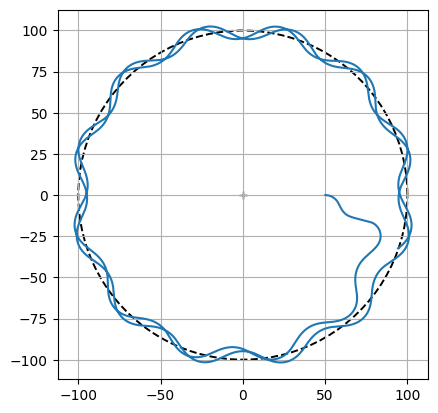

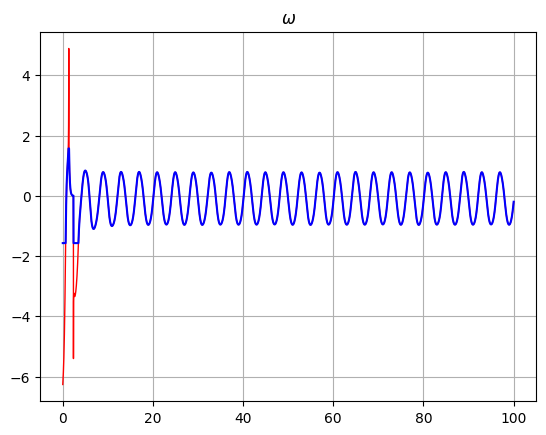

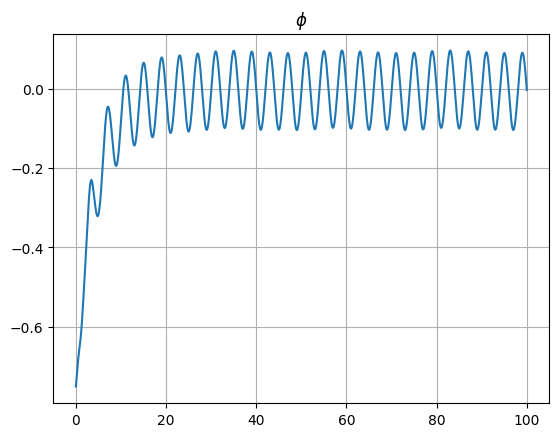

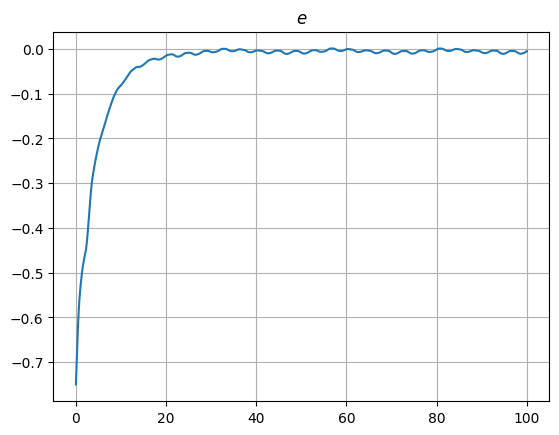

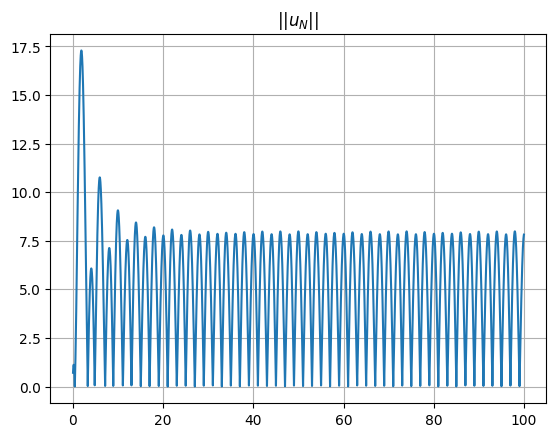

In [3]:
t_data = np.array(sim.data["t"])
p_data = np.array(sim.data["p"])
omegad_data = np.array(sim.data["omegad"])
omega_data = np.array(sim.data["omega"])
phi_data = np.array(sim.data["phi"])
e_data = np.array(sim.data["e"])
nnorm_data = np.array(sim.data["n_norm"])

# ----------------------------------------------------------------------

fig = plt.figure()
ax = fig.subplots()

gvf_traj.gen_vector_field(XYoff, 1000, s, ke)
gvf_traj.draw(fig, ax, lw=1.4, draw_field=False)

ax.plot(p_data[:,0,0], p_data[:,0,1])
ax.set_aspect("equal")
ax.grid(True)
plt.show()

# ----------------------------------------------------------------------

plt.plot(t_data, omegad_data, c="r", lw=1)
plt.plot(t_data, omega_data, c="b")
plt.title(r"$\omega$")
plt.grid(True)
plt.show()

# ----------------------------------------------------------------------

plt.plot(t_data, phi_data)
plt.title(r"$\phi$")
plt.grid(True)
# plt.ylim([-1,1])
plt.show()

# ----------------------------------------------------------------------

plt.plot(t_data, e_data)
plt.title(r"$e$")
plt.grid(True)
# plt.ylim([-1,1])
plt.show()

# ----------------------------------------------------------------------

plt.plot(t_data, nnorm_data)
plt.title(r"$||u_N||$")
plt.grid(True)
plt.show()